In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
from IPython.display import display
from IPython.display import Image
from tensorflow.keras.preprocessing import image
import os
import glob
import random

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/New folder (2)/'

/content/drive/MyDrive/Colab Notebooks/New folder (2)


In [ ]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/New folder (2)/thermal_DS/train'
valid_dir = '/content/drive/MyDrive/Colab Notebooks/New folder (2)/thermal_DS/val'
test_dir = '/content/drive/MyDrive/Colab Notebooks/New folder (2)/thermal_DS/test'
batch_size = 4


In [ ]:
img_h = 224
img_w = 224

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to target height and width.
        target_size=(img_h, img_w),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(img_h, img_w),
        batch_size=batch_size,
        class_mode='categorical')


Found 112 images belonging to 3 classes.
Found 56 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'continous': 0, 'more': 1, 'one': 2}

In [ ]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/New folder (2)/thermal_DS/train'
train_imgs = []
for path, subdirs, files in os.walk(train_dir):
    for name in files:
        train_imgs.append(os.path.join(path, name))

In [ ]:
train_imgs

['/content/drive/MyDrive/Colab Notebooks/New folder (2)/thermal_DS/train/more/29.png',
 '/content/drive/MyDrive/Colab Notebooks/New folder (2)/thermal_DS/train/more/30.png',
 '/content/drive/MyDrive/Colab Notebooks/New folder (2)/thermal_DS/train/more/31.png',
 '/content/drive/MyDrive/Colab Notebooks/New folder (2)/thermal_DS/train/more/32.png',
 '/content/drive/MyDrive/Colab Notebooks/New folder (2)/thermal_DS/train/more/33.png',
 '/content/drive/MyDrive/Colab Notebooks/New folder (2)/thermal_DS/train/more/34.png',
 '/content/drive/MyDrive/Colab Notebooks/New folder (2)/thermal_DS/train/more/35.png',
 '/content/drive/MyDrive/Colab Notebooks/New folder (2)/thermal_DS/train/more/36.png',
 '/content/drive/MyDrive/Colab Notebooks/New folder (2)/thermal_DS/train/more/37.png',
 '/content/drive/MyDrive/Colab Notebooks/New folder (2)/thermal_DS/train/more/38.png',
 '/content/drive/MyDrive/Colab Notebooks/New folder (2)/thermal_DS/train/more/39.png',
 '/content/drive/MyDrive/Colab Notebooks/Ne

In [ ]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 4.0 MB/s eta 0:00:00


In [ ]:
import efficientnet.tfkeras as efn
base_model = efn.EfficientNetB0(
    weights = 'imagenet',
    input_shape = (224,224,3),
    include_top = False,
    pooling = 'avg'
)

In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "efficientnet-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 32  128         ['stem_conv[0][0]']              
                                )                                                   

In [ ]:
cnn_model = keras.models.Sequential([
    base_model,
    keras.layers.Flatten(name= 'flatten'),
    keras.layers.Dense(224, activation = "relu"),
    keras.layers.Dropout(0.3, name="dropout_out11"),
    keras.layers.Dense(224, activation = "relu"),
    keras.layers.Dense(3, activation = "softmax"),
])

In [ ]:
cnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 1280)             4049564   
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense_30 (Dense)            (None, 224)               286944    
                                                                 
 dropout_out11 (Dropout)     (None, 224)               0         
                                                                 
 dense_31 (Dense)            (None, 224)               50400     
                                                                 
 dense_32 (Dense)            (None, 3)                 675       
                                                      

In [ ]:
cnn_model.compile(optimizer = optimizers.RMSprop(lr=2e-5),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

#loss = 'categorical_crossentropy'

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
NUM_TRAIN = sum([len(files) for r, d, files in os.walk(train_dir)])
NUM_TEST = sum([len(files) for r, d, files in os.walk(valid_dir)])

In [ ]:
history = cnn_model.fit_generator(
      train_generator,
      steps_per_epoch= NUM_TRAIN //batch_size,
      epochs=50,
      validation_data=validation_generator,
      validation_steps= NUM_TEST //batch_size,
      verbose=1,
)

Epoch 1/50


<ipython-input-74-cadb4bfa9e91>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = cnn_model.fit_generator(


28/28 [==============================] - 12s 191ms/step - loss: 1.0815 - accuracy: 0.4464 - val_loss: 1.0851 - val_accuracy: 0.4643
Epoch 2/50
28/28 [==============================] - 1s 46ms/step - loss: 1.0467 - accuracy: 0.4464 - val_loss: 1.0930 - val_accuracy: 0.3571
Epoch 3/50
28/28 [==============================] - 1s 45ms/step - loss: 1.0311 - accuracy: 0.5357 - val_loss: 1.1036 - val_accuracy: 0.2857
Epoch 4/50
28/28 [==============================] - 1s 47ms/step - loss: 1.0208 - accuracy: 0.5804 - val_loss: 1.1141 - val_accuracy: 0.2500
Epoch 5/50
28/28 [==============================] - 1s 47ms/step - loss: 1.0121 - accuracy: 0.5982 - val_loss: 1.1241 - val_accuracy: 0.2321
Epoch 6/50
28/28 [==============================] - 1s 47ms/step - loss: 1.0006 - accuracy: 0.6161 - val_loss: 1.1396 - val_accuracy: 0.2143
Epoch 7/50
28/28 [==============================] - 1s 46ms/step - loss: 0.9953 - accuracy: 0.5804 - val_loss: 1.1506 - val_accuracy: 0.1964
Epoch 8/50
28/28 [====

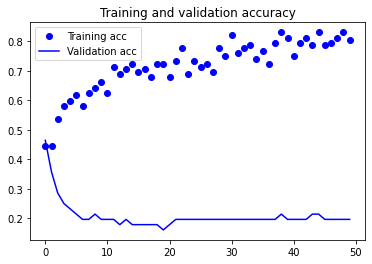

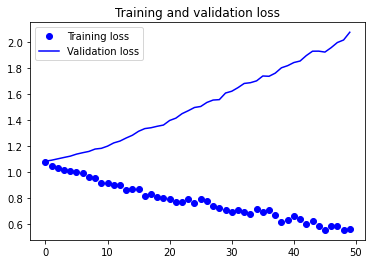

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_x = range(len(acc))

plt.plot(epochs_x, acc, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_x, loss, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
cnn_model.save('efficient2.h5')

In [ ]:
model  = load_model('/content/drive/MyDrive/Colab Notebooks/New folder (2)/efficient2.h5')

In [ ]:
test_gen = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_h, img_w),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 34 images belonging to 3 classes.


In [ ]:
pred_t = cnn_model.predict(test_gen)

9/9 [==============================] - 1s 30ms/step


In [ ]:
pred_t

array([[0.18029141, 0.78516495, 0.0345436 ],
       [0.23374774, 0.6894314 , 0.07682084],
       [0.13844106, 0.7980479 , 0.06351106],
       [0.22161582, 0.73778564, 0.04059849],
       [0.28600588, 0.28065073, 0.43334332],
       [0.12410937, 0.8492193 , 0.02667138],
       [0.11148228, 0.84869117, 0.03982647],
       [0.15022998, 0.78519005, 0.06457996],
       [0.09733934, 0.81883407, 0.08382662],
       [0.12644286, 0.7465758 , 0.12698139],
       [0.17774688, 0.6419752 , 0.18027788],
       [0.17373243, 0.6979966 , 0.128271  ],
       [0.1677759 , 0.7055593 , 0.12666476],
       [0.19176094, 0.55787367, 0.25036538],
       [0.05177338, 0.9165097 , 0.03171691],
       [0.1777473 , 0.5654586 , 0.25679415],
       [0.06200368, 0.8905554 , 0.04744089],
       [0.05630698, 0.89945847, 0.04423449],
       [0.1467529 , 0.60258955, 0.25065756],
       [0.05550034, 0.06240619, 0.8820934 ],
       [0.05235654, 0.05333143, 0.89431196],
       [0.05357097, 0.06197423, 0.8844548 ],
       [0.

In [ ]:
pred_t.shape

(34, 3)

In [ ]:
test_gen.labels

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
test = []

for i in pred_t:
  test.append(np.argmax(i))

test = np.asarray(test)

In [ ]:
test

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

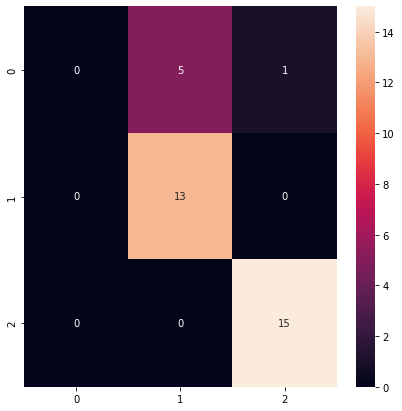

In [ ]:
from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(test_gen.labels, test)
plt.figure(figsize = (7,7))
sns.heatmap(cm_1, annot=True)

In [ ]:
test_gen.class_indices

{'continous': 0, 'more': 1, 'one': 2}

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(test_gen.labels, test, labels = [0,1,2])
print(report)

              precision    recall  f1-score   support

           0       0.25      0.17      0.20         6
           1       0.64      0.69      0.67        13
           2       0.94      1.00      0.97        15

    accuracy                           0.74        34
   macro avg       0.61      0.62      0.61        34
weighted avg       0.70      0.74      0.72        34



In [ ]:
test_dir = '/content/drive/MyDrive/Colab Notebooks/New folder (2)/thermal_DS/test'
test_imgs = []
for path, subdirs, files in os.walk(test_dir):
    for name in files:
        test_imgs.append(os.path.join(path, name))
random_test_image = random.choice(test_imgs)
random_test_image

'/content/drive/MyDrive/Colab Notebooks/New folder (2)/thermal_DS/test/more/182.png'

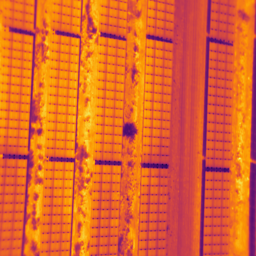

In [ ]:
Image(filename=random_test_image)

In [ ]:
#recover class names from the train dataset generator
class_lookup = dict((y,x) for x,y in train_generator.class_indices.items())

def predict_image(img_path, class_lookup):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(224, 224))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])[0][0]
    result_verbose = model.predict([x])
    print(result_verbose)
    predicted_class = class_lookup[np.argmax(result_verbose, axis=1)[0]]
    predicted_probability = result_verbose[0][np.argmax(result_verbose, axis=1)[0]]

    return predicted_class ,predicted_probability, result_verbose

print(predict_image(random_test_image, class_lookup))

1/1 [==============================] - 0s 27ms/step
[[0.5329781  0.27418914 0.19283275]]
('continous', 0.5329781, array([[0.5329781 , 0.27418914, 0.19283275]], dtype=float32))


here the code of remove all image except the number which u want

In [ ]:
# train_dir = '/content/drive/MyDrive/Colab Notebooks/New folder (2)/thermal_DS/train'
# valid_dir = '/content/drive/MyDrive/Colab Notebooks/New folder (2)/thermal_DS/val'
# test_dir = '/content/drive/MyDrive/Colab Notebooks/New folder (2)/thermal_DS/test'


In [ ]:
# import os
# import random
# def delete_all_but(split_path, number):
#   images = []
#   for path, subdirs, files in os.walk(split_path):
#       for name in files:
#           images.append(os.path.join(path, name))
#   if len(images) > number:
#     keep = random.sample(images, number)
#     for img in images:
#       if img not in keep:
#         os.remove(img)
#   return None

# # the function calling
# delete_all_but(train_dir, 25)
# delete_all_but(valid_dir, 25)
# delete_all_but(test_dir, 25)
